## 🔍 Overview
###### In this session you'll:
###### - Learn the difference between pandas and spark dataframes
###### - Understand when to use each tool
###### - Run a performance comparison using `timeit`
###### - Convert between spark and pandas
###### - Try guided exercises

# 📘 Introduction to PySpark and Distributed Processing
# 
##### 🧠 Why Move Beyond Local Processing?
###### - Traditional tools like Python or R are great for local data tasks.
###### - However, local machines struggle with large datasets — memory, compute power, and I/O are limiting factors.
###### ⚡ Enter Distributed Processing
###### - Distributed systems split a task across multiple computers (nodes) that work in parallel.
###### - Ideal for big data workloads such as analytics and machine learning on massive datasets.
###### 
<br><br><br><br>
##### 🚀 What is Apache Spark?
###### - Apache Spark is a distributed processing engine for big data and ML.
###### - Can process petabytes of data — beyond the scale of local tools.
###### - Known for being faster and more flexible than Hadoop MapReduce.
###### - Used by major companies like IBM, Amazon, Yahoo.
###### 
<br><br><br><br>


##### 🐍 What is PySpark?
###### - PySpark is the Python API for Apache Spark.
###### - Lets you:
######     - Write Python or SQL-like syntax.
######     - Manipulate distributed data.
######     - Build and tune ML models.
###### - Enables Python users to work seamlessly with big data.
###### 
<br><br><br><br>
##### 🚦 Why Use PySpark?
###### 
###### ✅ Benefits:
###### - Scalable: Handles petabytes of data where Pandas or Dask fail.
###### - Fast: More efficient than many traditional Python libraries.
###### - Streaming: Supports real-time data processing (vs. Hadoop’s batch-only).
###### - Fault Tolerant: Automatically recovers from failures.
###### - In-Memory: Stores data in RAM for faster access.
###### - No local disk needed: Can run on systems without SSD/HDD.
<br><br><br><br>

##### ⚡ What Happens When You Start a Fabric Notebook?
###### When you launch a notebook in Microsoft Fabric, the platform tries to connect to a live Spark pool to give you a near-instant startup experience.
###### 
###### ✅ By default:
###### Most sessions start in under 10 seconds thanks to live pools.
###### 
###### This is true when using default settings with no custom libraries or networking.
<br><br><br><br>

##### 🧱 What Slows Things Down?

##### Certain configurations prevent the use of live pools and cause Fabric to spin up a new Spark cluster, which can take several minutes:
##### 
##### 📚 Custom libraries (e.g., using %pip install)
##### 
##### 🔁 Changing pool settings
##### 
##### 🔒 Private Links / VNet
##### 
##### 🌐 Managed Private Endpoints
##### 
##### 🚦 High traffic on the cluster
<br><br><br><br>

### 🔍 What is a Spark DataFrame?
###### It's the distributed equivalent of a pandas DataFrame
###### 
###### Comes from the PySpark API (not pandas)
###### 
###### Built to handle big data in a clustered or parallel environment

In [1]:
# ✅ Setup 
import pandas as pd
import numpy as np
from pyspark.sql.functions import col, count, isnull, when, length
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore") # this won’t suppress errors, just non-breaking warnings like font issues or deprecation notices.


StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 3, Finished, Available, Finished)

Cache file does not exists. resource=$ml, path=$/nfs4/tridenttokenlibrary/tokens/ml.token
failed to get ml token
Traceback (most recent call last):
  File "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/synapse/ml/fabric/token_utils.py", line 156, in _get_access_token_from_token_lib
    return PyTridentTokenLibrary.get_access_token_from_cache(resource)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/trident_token_library_wrapper.py", line 71, in get_access_token_from_cache
    raise IOError(err_msg)
OSError: Cache file does not exists. resource=$ml, path=$/nfs4/tridenttokenlibrary/tokens/ml.token


In [2]:
df_spark = spark.read.format("csv").option("header","true").load("Files/personality_dataset.csv")
# df now is a Spark DataFrame containing CSV data from "Files/personality_dataset.csv".
display(df_spark)

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, b579bf07-0b48-4305-9c27-8441aa3395ef)

In [3]:

type(df_spark)

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 5, Finished, Available, Finished)

pyspark.sql.dataframe.DataFrame

| Option                  | Description                                              |
| ----------------------- | -------------------------------------------------------- |
| `"header", "true"`      | First row is used as column headers                      |
| `"inferSchema", "true"` | Automatically infers types (int, float, string)          |
| `"format('csv')"`       | Specifies that the file format is CSV                    |
| `"load(...)"`           | Path to the file inside the Lakehouse's `Files/` section |


In [4]:
# Load a CSV from the Lakehouse 'Files' folder
df_spark = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("Files/personality_dataset.csv")


df_spark.show()

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 6, Finished, Available, Finished)

+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+
|Time_spent_Alone|Stage_fear|Social_event_attendance|Going_outside|Drained_after_socializing|Friends_circle_size|Post_frequency|Personality|
+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+
|             4.0|        No|                    4.0|          6.0|                       No|               13.0|           5.0|  Extrovert|
|             9.0|       Yes|                    0.0|          0.0|                      Yes|                0.0|           3.0|  Introvert|
|             9.0|       Yes|                    1.0|          2.0|                      Yes|                5.0|           2.0|  Introvert|
|             0.0|        No|                    6.0|          7.0|                       No|               14.0|           8.0|  Extrovert|
|            

In [5]:
# Get number of rows
num_rows = df_spark.count()

# Get number of columns
num_cols = len(df_spark.columns)

# Mimic df.shape
print((num_rows, num_cols))

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 7, Finished, Available, Finished)

(2900, 8)


###### ✅ df_spark now holds a Spark DataFrame
###### ❌ You can’t use .plot(), .describe() (without quotes), or .iloc like you do in pandas.
###### ✅ You can use other methods and spark.sql and sql though...

In [6]:
df_spark.printSchema()

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 8, Finished, Available, Finished)

root
 |-- Time_spent_Alone: double (nullable = true)
 |-- Stage_fear: string (nullable = true)
 |-- Social_event_attendance: double (nullable = true)
 |-- Going_outside: double (nullable = true)
 |-- Drained_after_socializing: string (nullable = true)
 |-- Friends_circle_size: double (nullable = true)
 |-- Post_frequency: double (nullable = true)
 |-- Personality: string (nullable = true)



In [7]:
# Filter for Extroverts
df_extroverts = df_spark.filter(col("Personality") == "Extrovert")
df_extroverts.show(15)

# Filter for Introverts
df_introverts = df_spark.filter(col("Personality") == "Introvert")
df_introverts.show(15)

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 9, Finished, Available, Finished)

+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+
|Time_spent_Alone|Stage_fear|Social_event_attendance|Going_outside|Drained_after_socializing|Friends_circle_size|Post_frequency|Personality|
+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+
|             4.0|        No|                    4.0|          6.0|                       No|               13.0|           5.0|  Extrovert|
|             0.0|        No|                    6.0|          7.0|                       No|               14.0|           8.0|  Extrovert|
|             3.0|        No|                    9.0|          4.0|                       No|                8.0|           5.0|  Extrovert|
|             1.0|        No|                    7.0|          5.0|                       No|                6.0|           6.0|  Extrovert|
|            

In [8]:
# Count by Personality
df_spark.groupBy("Personality").count().show()

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 10, Finished, Available, Finished)

+-----------+-----+
|Personality|count|
+-----------+-----+
|  Extrovert| 1491|
|  Introvert| 1409|
+-----------+-----+



In [9]:
# Null values check
df_spark.select([count(when(isnull(c), c)).alias(c) for c in df_spark.columns]).show()

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 11, Finished, Available, Finished)

+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+
|Time_spent_Alone|Stage_fear|Social_event_attendance|Going_outside|Drained_after_socializing|Friends_circle_size|Post_frequency|Personality|
+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+
|              63|        73|                     62|           66|                       52|                 77|            65|          0|
+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+



In [10]:
# Summary stats
df_spark.describe(["Time_spent_Alone", "Friends_circle_size", "Post_frequency"]).show()



StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 12, Finished, Available, Finished)

+-------+------------------+-------------------+-----------------+
|summary|  Time_spent_Alone|Friends_circle_size|   Post_frequency|
+-------+------------------+-------------------+-----------------+
|  count|              2837|               2823|             2835|
|   mean| 4.505816002819881|  6.268862911795962|3.564726631393298|
| stddev|3.4791923314542603|  4.289692830709213|2.926581789039745|
|    min|               0.0|                0.0|              0.0|
|    max|              11.0|               15.0|             10.0|
+-------+------------------+-------------------+-----------------+



In [11]:
# Use spark sql
df_spark.createOrReplaceTempView("personality")
result = spark.sql("SELECT Personality, AVG(Post_frequency) as avg_posts FROM personality GROUP BY Personality")
result.show()

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 13, Finished, Available, Finished)

+-----------+------------------+
|Personality|         avg_posts|
+-----------+------------------+
|  Extrovert| 5.638545953360768|
|  Introvert|1.3689179375453886|
+-----------+------------------+



In [12]:
spark.sql("""
    SELECT 
        Social_event_attendance,
        Personality,
        COUNT(*) AS count
    FROM personality
    GROUP BY Social_event_attendance, Personality
    ORDER BY Social_event_attendance
""").show()

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 14, Finished, Available, Finished)

+-----------------------+-----------+-----+
|Social_event_attendance|Personality|count|
+-----------------------+-----------+-----+
|                   NULL|  Extrovert|   28|
|                   NULL|  Introvert|   34|
|                    0.0|  Extrovert|   33|
|                    0.0|  Introvert|  345|
|                    1.0|  Introvert|  298|
|                    1.0|  Extrovert|   24|
|                    2.0|  Introvert|  361|
|                    2.0|  Extrovert|   47|
|                    3.0|  Extrovert|   24|
|                    3.0|  Introvert|  293|
|                    4.0|  Extrovert|  247|
|                    4.0|  Introvert|    8|
|                    5.0|  Introvert|    4|
|                    5.0|  Extrovert|  220|
|                    6.0|  Extrovert|  225|
|                    6.0|  Introvert|   14|
|                    7.0|  Extrovert|  219|
|                    7.0|  Introvert|   20|
|                    8.0|  Introvert|   17|
|                    8.0|  Extro

### 🧾 SQL: Personality Dataset

###### These SQL queries are designed to help you analyse the personality dataset using standard SQL syntax.

---

##### ✅ 1. Count by Personality Type


In [13]:
%%sql
SELECT 
  Personality, 
  COUNT(*) AS Total
FROM personality
GROUP BY Personality
ORDER BY Total DESC;


StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 15, Finished, Available, Finished)

<Spark SQL result set with 2 rows and 2 fields>

In [14]:
%%sql
SELECT 
  Personality, 
  COUNT(*) AS Total
FROM personality
GROUP BY Personality
ORDER BY Total DESC;


StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 16, Finished, Available, Finished)

<Spark SQL result set with 2 rows and 2 fields>

###### ✅ 2. Average Time Spent Alone by Personality

In [15]:
%%sql
SELECT 
  Personality, 
  ROUND(AVG(Time_spent_Alone), 1) AS Avg_Time_Alone
FROM personality
GROUP BY Personality
ORDER BY Avg_Time_Alone DESC;

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 17, Finished, Available, Finished)

<Spark SQL result set with 2 rows and 2 fields>

###### ✅ 3. Bucketed Post Frequency (Histogram Style)

In [16]:
%%sql
SELECT 
  FLOOR(Post_frequency / 5) * 5 AS Frequency_Bucket,
  COUNT(*) AS Count
FROM personality
GROUP BY FLOOR(Post_frequency / 5) * 5
ORDER BY Frequency_Bucket;

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 18, Finished, Available, Finished)

<Spark SQL result set with 4 rows and 2 fields>

###### ✅ Check for NULLs

In [17]:
%%sql
SELECT
  SUM(CASE WHEN Time_spent_Alone IS NULL THEN 1 ELSE 0 END) AS Null_Time_Alone,
  SUM(CASE WHEN Friends_circle_size IS NULL THEN 1 ELSE 0 END) AS Null_Friends,
  SUM(CASE WHEN Post_frequency IS NULL THEN 1 ELSE 0 END) AS Null_Posts
FROM personality;


StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 19, Finished, Available, Finished)

<Spark SQL result set with 1 rows and 3 fields>

| Feature         | `df_spark` (Spark)        | `df_pandas` (pandas)        |
| --------------- | ------------------------- | --------------------------- |
| Distributed     | ✅ Yes                     | ❌ No                        |
| Fits in memory  | ❌ Not required            | ✅ Yes                       |
| `.show()`       | ✅ Yes                     | ❌ No                        |
| `.toPandas()`   | ✅ Yes                     | ❌ N/A                       |
| Visualisation   | ❌ Needs pandas conversion | ✅ Direct plotting supported |
| Lazy evaluation | ✅ Yes                     | ❌ No                        |


##### 🧠 What does Lazy Evaluation mean in Spark?
###### Lazy evaluation means that Spark doesn't immediately run your transformations (like .filter(), .select(), .groupBy()) when you write them.
###### 
###### Instead, Spark builds a logical execution plan — and only runs it when an action is triggered.

In [18]:
import time

# Step 1: Time the plan definition (lazy transformation)
start_plan = time.time()

df_lazy = df_spark \
    .filter(col("Personality") == "Extrovert") \
    .filter(col("Social_event_attendance").isNotNull()) \
    .withColumn("Name_Length", length(col("Social_event_attendance"))) \
    .groupBy("Personality") \
    .count()

end_plan = time.time()
print(f"⏱️ Time to define transformation (planning only): {round(end_plan - start_plan, 5)} seconds")

# Step 2: Time the actual execution
start_exec = time.time()

df_lazy.show()

end_exec = time.time()
print(f"\n🚀 Time to execute transformation (.show()): {round(end_exec - start_exec, 2)} seconds")


StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 20, Finished, Available, Finished)

⏱️ Time to define transformation (planning only): 0.03568 seconds
+-----------+-----+
|Personality|count|
+-----------+-----+
|  Extrovert| 1463|
+-----------+-----+


🚀 Time to execute transformation (.show()): 0.42 seconds


In [19]:
# 7. Convert to pandas
df_pd = df_spark.toPandas()
df_pd.head()
#type(df_pd)


StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 21, Finished, Available, Finished)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [20]:
# 🕒 Compare pandas vs PySpark with a groupby
import time

start_pd = time.time()
df_pd.groupby("Personality")["Friends_circle_size"].mean()
end_pd = time.time()

pandas_time = (end_pd - start_pd) * 1_000  # in milliseconds
print(f"Pandas groupby took: {pandas_time:.2f} ms")

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 22, Finished, Available, Finished)

Pandas groupby took: 26.79 ms


In [21]:
# 🕒 PySpark groupby timing 
start_sp = time.time()
df_spark.groupBy("Personality").avg("Friends_circle_size").collect()
end_sp = time.time()

spark_time = (end_sp - start_sp) * 1_000  # in milliseconds
print(f"PySpark groupby took: {spark_time:.2f} ms")

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 23, Finished, Available, Finished)

PySpark groupby took: 266.14 ms


In [22]:
# ✅ Compare (simplified, readable)
if spark_time > 0:
    speed_ratio = spark_time / pandas_time
    print(f"\nPandas is approximately {speed_ratio:.1f}× faster than PySpark.")


StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 24, Finished, Available, Finished)


Pandas is approximately 9.9× faster than PySpark.


StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 25, Finished, Available, Finished)

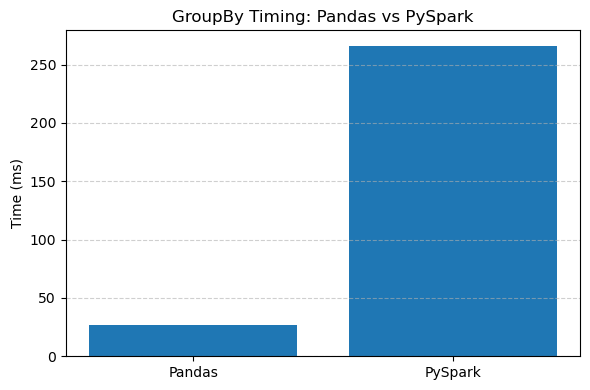

In [23]:
labels = ['Pandas', 'PySpark']
times = [pandas_time, spark_time]

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, times)
plt.ylabel("Time (ms)")
plt.title("GroupBy Timing: Pandas vs PySpark")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
#df_pd.shape
#df_pd.describe
df_pd.info

StatementMeta(, 7b0ff4a3-ce8b-4b26-91ac-c37505d4daa9, 26, Finished, Available, Finished)

<bound method DataFrame.info of       Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0                  4.0         No                      4.0            6.0   
1                  9.0        Yes                      0.0            0.0   
2                  9.0        Yes                      1.0            2.0   
3                  0.0         No                      6.0            7.0   
4                  3.0         No                      9.0            4.0   
...                ...        ...                      ...            ...   
2895               3.0         No                      7.0            6.0   
2896               3.0         No                      8.0            3.0   
2897               4.0        Yes                      1.0            1.0   
2898              11.0        Yes                      1.0            NaN   
2899               3.0         No                      6.0            6.0   

     Drained_after_socializing  Friends_cir

## 🤔 When to Use Which?
##### - **Use pandas** when:
  ###### - Data fits in memory
  ###### - You want fast prototyping
  ###### - You work in a single-machine environment

##### - **Use PySpark** when:
  ###### - Your dataset is too big for RAM
  ###### - You need distributed computing
  ###### - You're working in a cloud or cluster environment


## 📊 Mentimeter Quiz: Pandas vs PySpark

Time to check your understanding!

👉 Go to [menti.com](https://www.menti.com)  
🔢 Enter the code: **6247 1541**

You’ll answer 5 multiple choice questions to reinforce what you’ve just learned about:

- When to use pandas vs PySpark
- DataFrame differences
- Performance concepts
- Syntax familiarity

💡 Don’t worry — it's just for fun and learning!
